# This notebook will import fundamental factors. Note that there will be alot of missing data and we will demonstrate methods to handle them. 

In [3]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import norgate as ng

import datetime
import pickle
import matplotlib.pyplot as plt
%matplotlib inline 
import norgatedata 

[2020-10-23 12:26:49.714547] WARNING: Norgate Data: **PACKAGE VERSION WARNING*** You have version (1.0.46) of the norgatedata package installed.  A newer version 1.0.48 is available and is a recommended upgrade.
[2020-10-23 12:26:49.718245] WARNING: Norgate Data: To upgrade:  pip install norgatedata --upgrade
[2020-10-23 12:26:49.724779] INFO: Norgate Data: NorgateData package v1.0.46: Init complete


Shardar provides a way to access its data through Quandl's API. The core shunk of the data will be processed using local csv, but we are going to update some data using Quandl's, since Quandl's version is a more updated version. 

In [18]:
import quandl
quandl.ApiConfig.api_key = ''

Import index constituents, price, and volume once we have imported them from Norgate

In [33]:
index_const = pd.read_csv('russell3000_constituents_2002_1.csv',parse_dates=True,index_col=0)
price_df = pd.read_csv('russell3000_price_2002_1.csv',parse_dates=True,index_col=0)
volume_df = pd.read_csv('russell3000_volume_2002_1.csv',parse_dates=True,index_col=0)

Visualize number of constituents in time

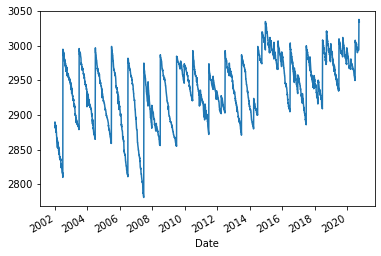

In [34]:
index_const.sum(axis=1).plot()

We create a communications protocol between Norgate's symbol and Sharadar's symbol nomenclature. For the rest of the project, we will be basing symbol names by Norgate. We create a dictionary so that in the future, we can rename quality and value dataframes (from Sharadar) columns by Norgate's symbols. 

For different companies with the same symbols, Sharadar names these companies with a format of 'sym','sym1',and 'sym2. The symbol with no numbers is the latest symbol and have not yet been delisted. As the numbers become greater, the older the companies. So in order of recency, 'sym' > 'sym1' > 'sym2'.

The below algorithm will match Norgate and Sharadar symbols taking into account recency and recycled symbol names as well. 

In [35]:
#maximum of same/recycled symbols in norgate data is 3
#first we form a list of lists that contain groupings of same symbol assets 
list_same_sym = []
temp_same_sym = []
base_sym = ''
potential_same_sym = ''
for i,sym in enumerate(index_const.columns):
    print(sym)
    # if there are no potential same symbol yet, we append
    if len(temp_same_sym) == 0:
        # we can split by '-' to get the actual symbol and remove delisted date
        base_sym = sym.split('-')[0]
        temp_same_sym.append(base_sym)
    elif len(temp_same_sym) == 1:
        # if theres a single potential same sym, we check if the next symbol has the same name or not
        # if yes then we append and move on to next symbol
        potential_same_sym = sym.split('-')[0]
        if base_sym == potential_same_sym:
            temp_same_sym.append(sym)
        # if not the same, then we start a new with a new symbol since there are no same symbols
        else:
            base_sym = potential_same_sym
            potential_same_sym = ''
            temp_same_sym = [sym]
            print(temp_same_sym)
    # for this case we have a list of same symbols that exceeds 1, but the idea is still the same
    else:
        
        potential_same_sym =sym.split('-')[0]
        # if the next symbol is the same, then we append thte symbol
        if base_sym == potential_same_sym:
            temp_same_sym.append(sym)
        else:
            # if the next symbol is not the same then we add our temporary same symbol list,
            # which contains the list of symbols that are the same so far
            # we append to our list_same_sym
            list_same_sym.append(temp_same_sym)
            print('added:', temp_same_sym)
            base_sym = potential_same_sym
            potential_same_sym = ''
            temp_same_sym = [sym]
            print(temp_same_sym)

#create a dionary of base symbol as key and list of norgate symbols that correspond to the base symbol as values
same_sym_dict = {}
for same_sym in list_same_sym:
    base_sym = same_sym[0].split('-')[0]
    same_sym_dict[base_sym] = same_sym
    
same_sym_list = list(same_sym_dict.keys())

# flatten the dictionary above to get a single key value 
full_sym_dict_2002 = {}
for sym in index_const.columns:
    
    if sym not in same_sym_list:
        len_sym = len(sym.split('-'))
        base_sym = sym.split('-')[0]
        if len_sym == 1:
            full_sym_dict_2002[base_sym] = [sym]
        else:
            full_sym_dict_2002[base_sym] = [sym]
#             df2.rename({sym:base_sym},axis=1,inplace=True)
    else:
        full_sym_dict_2002[sym] = same_sym_dict[sym]
    


A
AA
['AA']
AABA-201910
['AABA-201910']
AACC-201306
['AACC-201306']
AACE-200610
['AACE-200610']
AACH
['AACH']
AAI-201105
['AAI-201105']
AAIIQ-200603
['AAIIQ-200603']
AAL
['AAL']
AAMC
['AAMC']
AAMRQ-201312
['AAMRQ-201312']
AAN
['AAN']
AAN-201012
AAOI
added: ['AAN', 'AAN-201012']
['AAOI']
AAON
['AAON']
AAP
['AAP']
AAPL
['AAPL']
AAT
['AAT']
AATI-201201
['AATI-201201']
AAWHQ-200407
['AAWHQ-200407']
AAWW
['AAWW']
AAXN
['AAXN']
ABAT-201512
['ABAT-201512']
ABAX-201807
['ABAX-201807']
ABBC-201109
['ABBC-201109']
ABBV
['ABBV']
ABC
['ABC']
ABCB
['ABCB']
ABCD-201812
['ABCD-201812']
ABCO-201711
['ABCO-201711']
ABCW-201604
['ABCW-201604']
ABCWQ-201309
['ABCWQ-201309']
ABEO
['ABEO']
ABF-200308
['ABF-200308']
ABG
['ABG']
ABGX-200603
['ABGX-200603']
ABI-200811
['ABI-200811']
ABII-201010
['ABII-201010']
ABIO
['ABIO']
ABIZA-200204
['ABIZA-200204']
ABKFQ-201304
['ABKFQ-201304']
ABLSQ-200608
['ABLSQ-200608']
ABM
['ABM']
ABMD
['ABMD']
ABNK-200512
['ABNK-200512']
ABR
['ABR']
ABS-200606
['ABS-200606']
ABT
['

['ATML-201604']
ATN-200512
['ATN-200512']
ATNI
['ATNI']
ATNM
['ATNM']
ATNX
['ATNX']
ATNY-201604
['ATNY-201604']
ATO
['ATO']
ATOM
['ATOM']
ATPAQ-201412
['ATPAQ-201412']
ATR
['ATR']
ATRA
['ATRA']
ATRC
['ATRC']
ATRI
['ATRI']
ATRO
['ATRO']
ATRS
['ATRS']
ATRS-200704
ATRX
added: ['ATRS', 'ATRS-200704']
['ATRX']
ATRX-200411
ATSG
added: ['ATRX', 'ATRX-200411']
['ATSG']
ATSI-201008
['ATSI-201008']
ATSN-200604
['ATSN-200604']
ATTL-200301
['ATTL-200301']
ATUS
['ATUS']
ATVI
['ATVI']
ATW-201710
['ATW-201710']
ATX-201401
['ATX-201401']
ATXI
['ATXI']
AUB
['AUB']
AUBN
['AUBN']
AUGT-200602
['AUGT-200602']
AUMN
['AUMN']
AURDQ-201002
['AURDQ-201002']
AURFQ-200403
['AURFQ-200403']
AUTH-201210
['AUTH-201210']
AUTO
['AUTO']
AUXL-201501
['AUXL-201501']
AV-200710
['AV-200710']
AVA
['AVA']
AVAV
['AVAV']
AVB
['AVB']
AVCO
['AVCO']
AVCT-200912
['AVCT-200912']
AVD
['AVD']
AVDR-201911
['AVDR-201911']
AVEO
['AVEO']
AVGN-200912
['AVGN-200912']
AVGO
['AVGO']
AVGR
['AVGR']
AVGTF-201709
['AVGTF-201709']
AVHI-201810
['AV

['CAG']
CAH
['CAH']
CAI
['CAI']
CAKE
['CAKE']
CAL
['CAL']
CAL-201009
CALA
added: ['CAL', 'CAL-201009']
['CALA']
CALB
['CALB']
CALCQ-201103
['CALCQ-201103']
CALD-201804
['CALD-201804']
CALL-201811
['CALL-201811']
CALM
['CALM']
CALP-201111
['CALP-201111']
CALX
['CALX']
CAM-201604
['CAM-201604']
CAMD-201001
['CAMD-201001']
CAMP
['CAMP']
CAMZ-200304
['CAMZ-200304']
CANI-200704
['CANI-200704']
CANOQ-201208
['CANOQ-201208']
CAO-200807
['CAO-200807']
CAPA-200810
['CAPA-200810']
CAPS
['CAPS']
CAPX-200702
['CAPX-200702']
CAR
['CAR']
CARA
['CARA']
CARB-201912
['CARB-201912']
CARE
['CARE']
CARG
['CARG']
CARO-202005
['CARO-202005']
CARR
['CARR']
CARS
['CARS']
CARS-200512
CASA
added: ['CARS', 'CARS-200512']
['CASA']
CASC-201303
['CASC-201303']
CASC-201803
CASH
added: ['CASC-201303', 'CASC-201803']
['CASH']
CASI
['CASI']
CASLQ-201708
['CASLQ-201708']
CASS
['CASS']
CAST-201506
['CAST-201506']
CASY
['CASY']
CAT
['CAT']
CATA-200201
['CATA-200201']
CATB
['CATB']
CATC
['CATC']
CATM
['CATM']
CATO
['CATO']

added: ['CTRA', 'CTRA-200601']
['CTRCQ']
CTRE
['CTRE']
CTRL-201907
['CTRL-201907']
CTRN
['CTRN']
CTRX-200701
['CTRX-200701']
CTRX-201507
CTS
added: ['CTRX-200701', 'CTRX-201507']
['CTS']
CTSH
['CTSH']
CTSO
['CTSO']
CTT
['CTT']
CTV-201101
['CTV-201101']
CTVA
['CTVA']
CTWS-201910
['CTWS-201910']
CTX-200908
['CTX-200908']
CTXS
['CTXS']
CTZN-201404
['CTZN-201404']
CUB
['CUB']
CUBE
['CUBE']
CUBI
['CUBI']
CUDA-201802
['CUDA-201802']
CUE
['CUE']
CULP
['CULP']
CUNB-201710
['CUNB-201710']
CUNO-200508
['CUNO-200508']
CUREQ-200606
['CUREQ-200606']
CURO
['CURO']
CUTR
['CUTR']
CUZ
['CUZ']
CV-201206
['CV-201206']
CVA
['CVA']
CVAS-200307
['CVAS-200307']
CVBF
['CVBF']
CVC-201606
['CVC-201606']
CVCO
['CVCO']
CVCY
['CVCY']
CVD-201502
['CVD-201502']
CVEO
['CVEO']
CVET
['CVET']
CVG-201810
['CVG-201810']
CVGI
['CVGI']
CVGW
['CVGW']
CVH-201305
['CVH-201305']
CVHL
['CVHL']
CVI
['CVI']
CVIAQ
['CVIAQ']
CVLG
['CVLG']
CVLT
['CVLT']
CVLY
['CVLY']
CVM
['CVM']
CVNA
['CVNA']
CVNS-200707
['CVNS-200707']
CVON-201901
[

['EHTH']
EICU-200802
['EICU-200802']
EIDX
['EIDX']
EIG
['EIG']
EIGI
['EIGI']
EIGR
['EIGR']
EIHI-201312
['EIHI-201312']
EIX
['EIX']
EKDKQ-201309
['EKDKQ-201309']
EL
['EL']
ELA
['ELA']
ELAB-200507
['ELAB-200507']
ELAN
['ELAN']
ELBO-200510
['ELBO-200510']
ELF
['ELF']
ELGXQ-202010
['ELGXQ-202010']
ELK-200703
['ELK-200703']
ELLI-201904
['ELLI-201904']
ELMD
['ELMD']
ELMG-201108
['ELMG-201108']
ELNK-201702
['ELNK-201702']
ELNT-200205
['ELNT-200205']
ELON-201809
['ELON-201809']
ELOQ-201302
['ELOQ-201302']
ELOS-201707
['ELOS-201707']
ELOX
['ELOX']
ELRC-201608
['ELRC-201608']
ELS
['ELS']
ELVT
['ELVT']
ELX-201505
['ELX-201505']
ELY
['ELY']
EM-201111
['EM-201111']
EMAG-200904
['EMAG-200904']
EMAN
['EMAN']
EMBT-200706
['EMBT-200706']
EMBX-200701
['EMBX-200701']
EMC-201609
['EMC-201609']
EMCI-201909
['EMCI-201909']
EME
['EME']
EMEX-200207
['EMEX-200207']
EMGC
['EMGC']
EMIS
['EMIS']
EMKR
['EMKR']
EML
['EML']
EMMS
['EMMS']
EMN
['EMN']
EMR
['EMR']
EMS-201105
['EMS-201105']
ENCY-200806
['ENCY-200806']
E

GNW
['GNW']
GO
['GO']
GOCO
['GOCO']
GOGL
['GOGL']
GOGO
['GOGO']
GOLF
['GOLF']
GOOD
['GOOD']
GOOG
['GOOG']
GOOGL
['GOOGL']
GORO
['GORO']
GOSHA-200507
['GOSHA-200507']
GOSS
['GOSS']
GP-200512
['GP-200512']
GPC
['GPC']
GPI
['GPI']
GPK
['GPK']
GPMT
['GPMT']
GPN
['GPN']
GPOR
['GPOR']
GPRE
['GPRE']
GPRO
['GPRO']
GPRO-201207
GPS
added: ['GPRO', 'GPRO-201207']
['GPS']
GPT-200409
['GPT-200409']
GPT-200704
GPT-201512
GPT-201810
GPX
added: ['GPT-200409', 'GPT-200704', 'GPT-201512', 'GPT-201810']
['GPX']
GR-201207
['GR-201207']
GRA
['GRA']
GRAN-201110
['GRAN-201110']
GRB-201108
['GRB-201108']
GRBEQ-201304
['GRBEQ-201304']
GRBK
['GRBK']
GRC
['GRC']
GREY-200503
['GREY-200503']
GRHHQ-201710
['GRHHQ-201710']
GRIF
['GRIF']
GRM-201109
['GRM-201109']
GRMN
['GRMN']
GRNB-201209
['GRNB-201209']
GROW
['GROW']
GRP-200804
['GRP-200804']
GRPN
['GRPN']
GRT-201501
['GRT-201501']
GRTS
['GRTS']
GRTX
['GRTX']
GRUB
['GRUB']
GRWG
['GRWG']
GS
['GS']
GSAT
['GSAT']
GSB-200211
['GSB-200211']
GSB-202008
GSBC
added: ['GSB-2

IRGI-200410
['IRGI-200410']
IRGTQ-201712
['IRGTQ-201712']
IRIC-200312
['IRIC-200312']
IRIS-201210
['IRIS-201210']
IRIX
['IRIX']
IRM
['IRM']
IRMD
['IRMD']
IRT
['IRT']
IRT-200302
IRTC
added: ['IRT', 'IRT-200302']
['IRTC']
IRW-200806
['IRW-200806']
IRWD
['IRWD']
IRWNQ-201311
['IRWNQ-201311']
ISBC
['ISBC']
ISCA-201910
['ISCA-201910']
ISE-200712
['ISE-200712']
ISEE
['ISEE']
ISG-200504
['ISG-200504']
ISHCQ-201707
['ISHCQ-201707']
ISIL-201702
['ISIL-201702']
ISLE-201705
['ISLE-201705']
ISLN-201012
['ISLN-201012']
ISP-200302
['ISP-200302']
ISPH-201105
['ISPH-201105']
ISRG
['ISRG']
ISRL-201910
['ISRL-201910']
ISSC
['ISSC']
ISSI-201512
['ISSI-201512']
ISSX-200610
['ISSX-200610']
ISTA-201206
['ISTA-201206']
ISTR
['ISTR']
ISYS-201107
['ISYS-201107']
IT
['IT']
ITC-201610
['ITC-201610']
ITCD-201012
['ITCD-201012']
ITCI
['ITCI']
ITG-201902
['ITG-201902']
ITGR
['ITGR']
ITI
['ITI']
ITIC
['ITIC']
ITLN-200912
['ITLN-200912']
ITMN-201409
['ITMN-201409']
ITN-200405
['ITN-200405']
ITOS
['ITOS']
ITRI
['ITRI'

['LOV-201711']
LOVE
['LOVE']
LOW
['LOW']
LOXO-201902
['LOXO-201902']
LPCN
['LPCN']
LPG
['LPG']
LPHIQ-201612
['LPHIQ-201612']
LPI
['LPI']
LPLA
['LPLA']
LPNT-201811
['LPNT-201811']
LPS-201401
['LPS-201401']
LPSN
['LPSN']
LPT-202002
['LPT-202002']
LPTH
['LPTH']
LPX
['LPX']
LQ-201805
['LQ-201805']
LQDA
['LQDA']
LQDT
['LQDT']
LQI-200601
['LQI-200601']
LQMT
['LQMT']
LRCX
['LRCX']
LRMR
['LRMR']
LRN
['LRN']
LSBC-200805
['LSBC-200805']
LSBG-201701
['LSBG-201701']
LSCC
['LSCC']
LSCP-200607
['LSCP-200607']
LSE-201311
['LSE-201311']
LSI
['LSI']
LSI-201405
LSR-200911
added: ['LSI', 'LSI-201405']
['LSR-200911']
LSS-200706
['LSS-200706']
LSTR
['LSTR']
LSTZA-201111
['LSTZA-201111']
LSXMA
['LSXMA']
LSXMK
['LSXMK']
LTC
['LTC']
LTHM
['LTHM']
LTM-201506
['LTM-201506']
LTRE
['LTRE']
LTRPA
['LTRPA']
LTRX
['LTRX']
LTS-202002
['LTS-202002']
LTXB-201910
['LTXB-201910']
LU-200611
['LU-200611']
LUB
['LUB']
LUFK-201307
['LUFK-201307']
LULU
['LULU']
LUMCQ-200907
['LUMCQ-200907']
LUMN
['LUMN']
LUMO
['LUMO']
LUNA
['

['NEOF-200603']
NEOG
['NEOG']
NEON
['NEON']
NEOS
['NEOS']
NERV
['NERV']
NES
['NES']
NESCQ-201708
['NESCQ-201708']
NESR
['NESR']
NET
['NET']
NETE
['NETE']
NETE-200411
NETL-201202
added: ['NETE', 'NETE-200411']
['NETL-201202']
NEU
['NEU']
NEU-200310
NEV-200405
added: ['NEU', 'NEU-200310']
['NEV-200405']
NEWCQ-200808
['NEWCQ-200808']
NEWP-201604
['NEWP-201604']
NEWR
['NEWR']
NEWS-201712
['NEWS-201712']
NEWT
['NEWT']
NEX
['NEX']
NEXC-201009
['NEXC-201009']
NEXT
['NEXT']
NEXT-200801
NFB-200611
added: ['NEXT', 'NEXT-200801']
['NFB-200611']
NFBK
['NFBK']
NFG
['NFG']
NFLDQ-200910
['NFLDQ-200910']
NFLX
['NFLX']
NFP-201307
['NFP-201307']
NFS-200812
['NFS-200812']
NFX-201902
['NFX-201902']
NG
['NG']
NGAC-201008
['NGAC-201008']
NGEN-201404
['NGEN-201404']
NGHC
['NGHC']
NGM
['NGM']
NGS
['NGS']
NGSX-201603
['NGSX-201603']
NGVC
['NGVC']
NGVT
['NGVT']
NH
['NH']
NHC
['NHC']
NHI
['NHI']
NHP-201107
['NHP-201107']
NHR-200710
['NHR-200710']
NHTC
['NHTC']
NHWK-201012
['NHWK-201012']
NI
['NI']
NICK
['NICK']


['PMTR-200701']
PMTS
['PMTS']
PNC
['PNC']
PNCLQ-201305
['PNCLQ-201305']
PNFP
['PNFP']
PNFTQ-200504
['PNFTQ-200504']
PNG-200501
['PNG-200501']
PNK-201604
['PNK-201604']
PNK-201810
PNM
added: ['PNK-201604', 'PNK-201810']
['PNM']
PNN-200505
['PNN-200505']
PNNT
['PNNT']
PNNW-201201
['PNNW-201201']
PNP-200610
['PNP-200610']
PNR
['PNR']
PNRA-201707
['PNRA-201707']
PNRG
['PNRG']
PNSNQ-201308
['PNSNQ-201308']
PNTG
['PNTG']
PNTPQ-201807
['PNTPQ-201807']
PNW
['PNW']
PNWB-200310
['PNWB-200310']
PNX-201606
['PNX-201606']
PNY-201610
['PNY-201610']
PODD
['PODD']
POG-200505
['POG-200505']
POM-201603
['POM-201603']
PONE-201006
['PONE-201006']
PONR-200708
['PONR-200708']
POOL
['POOL']
POR
['POR']
PORK-200705
['PORK-200705']
PORT-200307
['PORT-200307']
POS-200710
['POS-200710']
POSS-200804
['POSS-200804']
POST
['POST']
POWI
['POWI']
POWL
['POWL']
POWR-201605
['POWR-201605']
POZN-201602
['POZN-201602']
PP-200601
['PP-200601']
PPBI
['PPBI']
PPC
['PPC']
PPCO-201011
['PPCO-201011']
PPD
['PPD']
PPD-201106
PP

['SFD-201309']
SFE
['SFE']
SFFB-200404
['SFFB-200404']
SFFS-200607
['SFFS-200607']
SFG-201603
['SFG-201603']
SFIX
['SFIX']
SFL
['SFL']
SFLY-201909
['SFLY-201909']
SFM
['SFM']
SFN-201109
['SFN-201109']
SFNC
['SFNC']
SFNT-200704
['SFNT-200704']
SFPI-200812
['SFPI-200812']
SFR-201711
['SFR-201711']
SFS-201906
['SFS-201906']
SFSF-201202
['SFSF-201202']
SFST
['SFST']
SFSW-200510
['SFSW-200510']
SFXEQ-201612
['SFXEQ-201612']
SFYWQ-201604
['SFYWQ-201604']
SGA
['SGA']
SGBK-201709
['SGBK-201709']
SGC
['SGC']
SGDE-200608
['SGDE-200608']
SGEN
['SGEN']
SGH
['SGH']
SGI-201610
['SGI-201610']
SGICQ-200912
['SGICQ-200912']
SGID-200610
['SGID-200610']
SGK-201407
['SGK-201407']
SGM-201705
['SGM-201705']
SGMO
['SGMO']
SGMS
['SGMS']
SGNT-201608
['SGNT-201608']
SGP-200911
['SGP-200911']
SGRY
['SGRY']
SGS-201204
['SGS-201204']
SGSF-200207
['SGSF-200207']
SGTL-200804
['SGTL-200804']
SGY-201805
['SGY-201805']
SGYPQ-201905
['SGYPQ-201905']
SHAK
['SHAK']
SHAW-201302
['SHAW-201302']
SHBI
['SHBI']
SHEN
['SHEN']
S

TOPP-200710
['TOPP-200710']
TORZ-201812
['TORZ-201812']
TOUSQ-201308
['TOUSQ-201308']
TOWN
['TOWN']
TOWR-201909
['TOWR-201909']
TOY-200507
['TOY-200507']
TPB
['TPB']
TPC
['TPC']
TPC-200802
TPCG-201212
added: ['TPC', 'TPC-200802']
['TPCG-201212']
TPCO
['TPCO']
TPGI-201312
['TPGI-201312']
TPH
['TPH']
TPHS
['TPHS']
TPIC
['TPIC']
TPLMQ-201906
['TPLMQ-201906']
TPPHQ-201203
['TPPHQ-201203']
TPR
['TPR']
TPRE
['TPRE']
TPTH-200612
['TPTH-200612']
TPTI-200501
['TPTI-200501']
TPTX
['TPTX']
TPX
['TPX']
TPY-200510
['TPY-200510']
TQNT-201412
['TQNT-201412']
TR
['TR']
TRA-201004
['TRA-201004']
TRAD-201106
['TRAD-201106']
TRAK-201509
['TRAK-201509']
TRB-200712
['TRB-200712']
TRBC-200209
['TRBC-200209']
TRBN-201010
['TRBN-201010']
TRBS-200611
['TRBS-200611']
TRC
['TRC']
TRCA-200810
['TRCA-200810']
TRCB-201912
['TRCB-201912']
TRCO-201909
['TRCO-201909']
TRCR-201204
['TRCR-201204']
TRDO-200604
['TRDO-200604']
TRE-200302
['TRE-200302']
TREC
['TREC']
TREE
['TREE']
TREE-200308
TREX
added: ['TREE', 'TREE-200

VREX
['VREX']
VRM
['VRM']
VRNM-201310
['VRNM-201310']
VRNS
['VRNS']
VRNT
['VRNT']
VRRM
['VRRM']
VRS
['VRS']
VRSK
['VRSK']
VRSN
['VRSN']
VRSOQ-201301
['VRSOQ-201301']
VRSZQ-201607
['VRSZQ-201607']
VRT
['VRT']
VRTS
['VRTS']
VRTS-200507
VRTU
added: ['VRTS', 'VRTS-200507']
['VRTU']
VRTV
['VRTV']
VRTX
['VRTX']
VRTY-200512
['VRTY-200512']
VRUS-201201
['VRUS-201201']
VRX-201009
['VRX-201009']
VSAT
['VSAT']
VSB-201407
['VSB-201407']
VSCN-200801
['VSCN-200801']
VSEA-201111
['VSEA-201111']
VSEC
['VSEC']
VSH
['VSH']
VSI-201912
['VSI-201912']
VSLR
['VSLR']
VSM-201910
['VSM-201910']
VST
['VST']
VSTA-200803
['VSTA-200803']
VSTM
['VSTM']
VSTNQ-201010
['VSTNQ-201010']
VSTO
['VSTO']
VSUNQ-201008
['VSUNQ-201008']
VTAE-201610
['VTAE-201610']
VTAI-200611
['VTAI-200611']
VTAL-201106
['VTAL-201106']
VTEQ
['VTEQ']
VTGDF
['VTGDF']
VTIV-201008
['VTIV-201008']
VTNR
['VTNR']
VTOL
['VTOL']
VTR
['VTR']
VTRO-201203
['VTRO-201203']
VTRU-200708
['VTRU-200708']
VTS-200701
['VTS-200701']
VTSS-201504
['VTSS-201504']
VTV

In [36]:
list_same_sym

[['AAN', 'AAN-201012'],
 ['ACMR', 'ACMR-201111'],
 ['ACTV-200306', 'ACTV-201311'],
 ['ADT', 'ADT-201604'],
 ['AGE', 'AGE-200709'],
 ['AGN-201503', 'AGN-202005'],
 ['AGR', 'AGR-200703'],
 ['ALLE', 'ALLE-200404'],
 ['ALTR', 'ALTR-201512'],
 ['AM', 'AM-201308'],
 ['AMH', 'AMH-200611'],
 ['AMN', 'AMN-201110'],
 ['AMPH', 'AMPH-201011'],
 ['ANET', 'ANET-200711'],
 ['APTI-200604', 'APTI-201901'],
 ['ARCT', 'ARCT-201301'],
 ['ARD', 'ARD-201007'],
 ['ARI', 'ARI-200605'],
 ['AT', 'AT-200711'],
 ['ATRS', 'ATRS-200704'],
 ['ATRX', 'ATRX-200411'],
 ['AVNT', 'AVNT-200206'],
 ['AWK', 'AWK-200301'],
 ['BEAM', 'BEAM-201404'],
 ['BFAM', 'BFAM-200805'],
 ['BH', 'BH-201804'],
 ['BJ', 'BJ-201109'],
 ['BKI', 'BKI-201308'],
 ['BKR', 'BKR-201310'],
 ['BL', 'BL-200704'],
 ['BLUE', 'BLUE-200505'],
 ['BNK-200503', 'BNK-200704', 'BNK-201607'],
 ['BOOT', 'BOOT-201208'],
 ['BOX', 'BOX-201304'],
 ['BR', 'BR-200603'],
 ['BRNC-200411', 'BRNC-201106'],
 ['BRY', 'BRY-201312'],
 ['BV', 'BV-201801'],
 ['BXG', 'BXG-201304'

## Handling Sharadar and Importing Fundamental Factors

We replace ABK in ticker table with ABKFQ, they just updated because I fired an email to them on 30/9/2020. So i got info of ABKFQ from api table, and then replace it on the same table in csv format, since I downloaded the csv before they updated ticker information

In [19]:
#abkfq from quandl
abkfq = quandl.get_table('SHARADAR/TICKERS',ticker='ABKFQ')

In [20]:
#import ticker table from local
sha_ticker = pd.read_csv('SHARADAR_TICKERS.csv')

In [21]:
#replace
sha_ticker[sha_ticker['ticker'] == 'ABK'] = abkfq.values

We get all symbols in the tickers in SF1 table. The SF1 table is the core fundamental data we are going to use. It contains a time series of symbols's financial reports in a long format.

In [22]:
ticker_list = list(sha_ticker[sha_ticker['table']=='SF1']['ticker'])

We count how many assets are missing from our norgate base of symbols. We query through possibilities of symbols having 1 and 2 at the back of symbol names in Shardar. We check if there is the symbol name in Sharadar or not. 

In [37]:
count = 0
no_funda_list = [] # symbols that are not present
yes_funda_list = [] # storing symbols that are present in SF1
for sym0 in index_const.columns:
    sym = sym0.split('-')[0]
    #get symbol name 
    if sym not in ticker_list: 
        #if symbol not in ticker_list then check for 'sym1' format
        if sym + '1' not in ticker_list:
            # if 'sym1' format not in, then check for 'sym2'
            if sym +'2' not in ticker_list:
                count+=1
                no_funda_list.append(sym0)
                
            elif sym + '2' in ticker_list:
                print(sym + '1')
                print('is in: ' + sym+'2')
                
                # the rest of the 'else' conditions satisfies the symbol data being present
            else: 
                
                if sym not in yes_funda_list: yes_funda_list.append(sym)
        else:
            if sym not in yes_funda_list: yes_funda_list.append(sym)
    else: 
        if sym not in yes_funda_list: yes_funda_list.append(sym)
            
            
            
print(count)

FCOM1
is in: FCOM2
SAF1
is in: SAF2
274


we have 274 symbols that are not in Sharadar's data

We create a fundamental symbol dictionary that contains base symbol as key and value as all the Sharadar symbol names

In [39]:
funda_dict_2002 = {}
for sym in yes_funda_list:
    temp_list = []
    if sym in ticker_list:
        temp_list.append(sym)
    
    if sym + '1' in ticker_list:
        temp_list.append(sym+'1')
    if sym + '2' in ticker_list:
        temp_list.append(sym+'2')
    
    funda_dict_2002[sym] = temp_list

In [40]:
funda_dict_2002 

{'A': ['A'],
 'AA': ['AA'],
 'AACC': ['AACC'],
 'AACE': ['AACE'],
 'AACH': ['AACH'],
 'AAI': ['AAI', 'AAI1'],
 'AAIIQ': ['AAIIQ'],
 'AAL': ['AAL'],
 'AAMC': ['AAMC'],
 'AAMRQ': ['AAMRQ'],
 'AAN': ['AAN'],
 'AAOI': ['AAOI'],
 'AAON': ['AAON'],
 'AAP': ['AAP'],
 'AAPL': ['AAPL'],
 'AAT': ['AAT'],
 'AATI': ['AATI', 'AATI1'],
 'AAWHQ': ['AAWHQ'],
 'AAWW': ['AAWW'],
 'AAXN': ['AAXN'],
 'ABAT': ['ABAT'],
 'ABAX': ['ABAX'],
 'ABBC': ['ABBC'],
 'ABBV': ['ABBV'],
 'ABC': ['ABC'],
 'ABCB': ['ABCB'],
 'ABCD': ['ABCD'],
 'ABCO': ['ABCO', 'ABCO1'],
 'ABCW': ['ABCW'],
 'ABEO': ['ABEO'],
 'ABF': ['ABF'],
 'ABG': ['ABG'],
 'ABGX': ['ABGX'],
 'ABI': ['ABI', 'ABI1'],
 'ABII': ['ABII'],
 'ABIO': ['ABIO', 'ABIO1'],
 'ABIZA': ['ABIZA'],
 'ABKFQ': ['ABKFQ'],
 'ABLSQ': ['ABLSQ'],
 'ABM': ['ABM'],
 'ABMD': ['ABMD'],
 'ABNK': ['ABNK1'],
 'ABR': ['ABR', 'ABR1'],
 'ABS': ['ABS'],
 'ABT': ['ABT'],
 'ABTX': ['ABTX'],
 'ABUS': ['ABUS'],
 'ABVT': ['ABVT'],
 'ABWTQ': ['ABWTQ'],
 'AC': ['AC'],
 'ACA': ['ACA'],
 'ACAD'

## Reasons why many tickers are not included in SF1:
- it's a fund not a company, so the financial report would be different
- company reporting started before 2000 (sharadar promised 20 years of data going back)
- the ticker included in russell 3000 norgate is a series c company and doesn't have a report in SF1, although SF1 may contain reports from series a, i think they are probably the same reports since it's the same company. i.e. FWONK (series C, not in SF1) is in Russell3000 but not FWONA (series A, which is in SF1). I do not know how to convert these two and code in python to query fundamentals from SF1 yet. For now, we're just gonna have to manually add stuff. In this case, I decided that I will not procede in deciding that I will go for this, too much of a hassle. 

Inverting full sym dict from keys to values and values to keys and flatten 

In [41]:
full_sym_dict_2002_invert = {}
for key in full_sym_dict_2002:
    for sym in full_sym_dict_2002[key]:
        full_sym_dict_2002_invert[sym] = key
        


In [42]:
full_sym_dict_2002_invert

{'A': 'A',
 'AA': 'AA',
 'AABA-201910': 'AABA',
 'AACC-201306': 'AACC',
 'AACE-200610': 'AACE',
 'AACH': 'AACH',
 'AAI-201105': 'AAI',
 'AAIIQ-200603': 'AAIIQ',
 'AAL': 'AAL',
 'AAMC': 'AAMC',
 'AAMRQ-201312': 'AAMRQ',
 'AAN-201012': 'AAN',
 'AAOI': 'AAOI',
 'AAON': 'AAON',
 'AAP': 'AAP',
 'AAPL': 'AAPL',
 'AAT': 'AAT',
 'AATI-201201': 'AATI',
 'AAWHQ-200407': 'AAWHQ',
 'AAWW': 'AAWW',
 'AAXN': 'AAXN',
 'ABAT-201512': 'ABAT',
 'ABAX-201807': 'ABAX',
 'ABBC-201109': 'ABBC',
 'ABBV': 'ABBV',
 'ABC': 'ABC',
 'ABCB': 'ABCB',
 'ABCD-201812': 'ABCD',
 'ABCO-201711': 'ABCO',
 'ABCW-201604': 'ABCW',
 'ABCWQ-201309': 'ABCWQ',
 'ABEO': 'ABEO',
 'ABF-200308': 'ABF',
 'ABG': 'ABG',
 'ABGX-200603': 'ABGX',
 'ABI-200811': 'ABI',
 'ABII-201010': 'ABII',
 'ABIO': 'ABIO',
 'ABIZA-200204': 'ABIZA',
 'ABKFQ-201304': 'ABKFQ',
 'ABLSQ-200608': 'ABLSQ',
 'ABM': 'ABM',
 'ABMD': 'ABMD',
 'ABNK-200512': 'ABNK',
 'ABR': 'ABR',
 'ABS-200606': 'ABS',
 'ABT': 'ABT',
 'ABTX': 'ABTX',
 'ABUS': 'ABUS',
 'ABVT-201206'

Creating a reference dictionary from norgate symbol to sharadar fundamental symbol. This is our communications gateway between the two vendors. We take into account order of recency.

In [43]:
funda_sym_ref = {}
count = 0
for key,value in full_sym_dict_2002_invert.items():
    switch = True
    if value in funda_dict_2002:
        switch = False
        split_sym = key.split('-')
        if len(split_sym) == 1:
            funda_sym_ref[key] = funda_dict_2002[value][0]
            switch = True
        else:
            if len(funda_dict_2002[value]) == 1:
                funda_sym_ref[key] = funda_dict_2002[value][0]
                switch = True
            else: 
                date_sym = pd.to_datetime(split_sym[1],format='%Y%m')
                
                for symm in funda_dict_2002[value]:
                    date_str = sha_ticker[(sha_ticker['ticker'] == symm) & (sha_ticker['table'] == 'SF1')]['firstquarter'].iloc[0]
                    date_funda = pd.to_datetime(date_str[:7],format='%Y-%m')
                    
                    if date_funda < date_sym:
                        funda_sym_ref[key] = symm
                        switch = True
                        break
    if switch == False:
        count += 1
        
print(count)
                    
                

0


In [44]:
pickle.dump( funda_sym_ref, open( "funda_sym_ref_1.pkl", "wb" ) )

In [45]:
funda_sym_ref

{'A': 'A',
 'AA': 'AA',
 'AACC-201306': 'AACC',
 'AACE-200610': 'AACE',
 'AACH': 'AACH',
 'AAI-201105': 'AAI',
 'AAIIQ-200603': 'AAIIQ',
 'AAL': 'AAL',
 'AAMC': 'AAMC',
 'AAMRQ-201312': 'AAMRQ',
 'AAN-201012': 'AAN',
 'AAOI': 'AAOI',
 'AAON': 'AAON',
 'AAP': 'AAP',
 'AAPL': 'AAPL',
 'AAT': 'AAT',
 'AATI-201201': 'AATI',
 'AAWHQ-200407': 'AAWHQ',
 'AAWW': 'AAWW',
 'AAXN': 'AAXN',
 'ABAT-201512': 'ABAT',
 'ABAX-201807': 'ABAX',
 'ABBC-201109': 'ABBC',
 'ABBV': 'ABBV',
 'ABC': 'ABC',
 'ABCB': 'ABCB',
 'ABCD-201812': 'ABCD',
 'ABCO-201711': 'ABCO',
 'ABCW-201604': 'ABCW',
 'ABEO': 'ABEO',
 'ABF-200308': 'ABF',
 'ABG': 'ABG',
 'ABGX-200603': 'ABGX',
 'ABI-200811': 'ABI',
 'ABII-201010': 'ABII',
 'ABIO': 'ABIO',
 'ABIZA-200204': 'ABIZA',
 'ABKFQ-201304': 'ABKFQ',
 'ABLSQ-200608': 'ABLSQ',
 'ABM': 'ABM',
 'ABMD': 'ABMD',
 'ABNK-200512': 'ABNK1',
 'ABR': 'ABR',
 'ABS-200606': 'ABS',
 'ABT': 'ABT',
 'ABTX': 'ABTX',
 'ABUS': 'ABUS',
 'ABVT-201206': 'ABVT',
 'ABWTQ-201012': 'ABWTQ',
 'AC': 'AC',


In [46]:
len(funda_sym_ref)

6729

We now have a total of 6729 out of 7265 columns

In [47]:
russell_constituent = index_const[funda_sym_ref.keys()]
russell_prices = price_df[funda_sym_ref.keys()]
russell_volume = volume_df[funda_sym_ref.keys()]

Checking for consistency of symbols

In [52]:
print(russell_constituent.shape)
print(russell_prices.shape)
print(russell_volume.shape)

(4719, 6729)
(4719, 6729)
(4719, 6729)


Re upload our Norgate data, consisting of intersection of available symbols between the Norgate and Sharadar

In [53]:
russell_constituent.to_csv('russell_constituent_pre_1.csv')
russell_prices.to_csv('russell_prices_pre_1.csv')
russell_volume.to_csv('russell_volume_pre_1.csv')

## Creating Quality and Value Factors: Uploading sharadar tables (faster than using api)

In [54]:
sf1_table = pd.read_csv('SHARADAR_SF1.csv')

check metrics

In [55]:
print(list(sf1_table.columns))

['ticker', 'dimension', 'calendardate', 'datekey', 'reportperiod', 'lastupdated', 'accoci', 'assets', 'assetsavg', 'assetsc', 'assetsnc', 'assetturnover', 'bvps', 'capex', 'cashneq', 'cashnequsd', 'cor', 'consolinc', 'currentratio', 'de', 'debt', 'debtc', 'debtnc', 'debtusd', 'deferredrev', 'depamor', 'deposits', 'divyield', 'dps', 'ebit', 'ebitda', 'ebitdamargin', 'ebitdausd', 'ebitusd', 'ebt', 'eps', 'epsdil', 'epsusd', 'equity', 'equityavg', 'equityusd', 'ev', 'evebit', 'evebitda', 'fcf', 'fcfps', 'fxusd', 'gp', 'grossmargin', 'intangibles', 'intexp', 'invcap', 'invcapavg', 'inventory', 'investments', 'investmentsc', 'investmentsnc', 'liabilities', 'liabilitiesc', 'liabilitiesnc', 'marketcap', 'ncf', 'ncfbus', 'ncfcommon', 'ncfdebt', 'ncfdiv', 'ncff', 'ncfi', 'ncfinv', 'ncfo', 'ncfx', 'netinc', 'netinccmn', 'netinccmnusd', 'netincdis', 'netincnci', 'netmargin', 'opex', 'opinc', 'payables', 'payoutratio', 'pb', 'pe', 'pe1', 'ppnenet', 'prefdivis', 'price', 'ps', 'ps1', 'receivables',

again, replace ABK with ABKFQ

In [56]:
sf1_table['ticker'].replace('ABK','ABKFQ',inplace=True)

We will use the ART data, as proposed in the report. The ART data is the most suitable for backtesting since it contains data as of the reporting period (no restatements). We also use the trailing 12 month since we can also query for roe and roic. 

In [57]:
sf1_art = sf1_table[sf1_table['dimension'] == 'ART']
# sf1_arq= sf1_table[sf1_table['dimension'] == 'ARQ']

For our Value and Quality factors: Filter quality and value metrics we are going to use: roe,roic,gross profitability, ebit/ev, price to sales

In [58]:

qa_val_df = sf1_art[['ticker','calendardate','datekey','dimension','roe','roic','gp','assets','ebit','ev','ps']]
qa_val_df['gprofitability'] = qa_val_df['gp']/qa_val_df['assets']
qa_val_df['ebit/ev'] = qa_val_df['ebit']/qa_val_df['ev']
# qa_val_df['YQ'] = qa_val_df['calendardate'].dt.year.astype(str) + '-'+ qa_val_df['calendardate'].dt.quarter.astype(str)
qa_val_art = qa_val_df.copy()

In [59]:
qa_val_art[qa_val_art['ticker'] == 'A']

,ticker,calendardate,datekey,dimension,roe,roic,gp,assets,ebit,ev,ps,gprofitability,ebit/ev
81,A,1999-09-30,2000-01-25,ART,NaN,NaN,3.943000e+09,5.444000e+09,7.870000e+08,3.059588e+10,3.673,0.724284,0.025722
82,A,1999-12-31,2000-03-15,ART,NaN,NaN,NaN,7.107000e+09,NaN,5.096060e+10,NaN,NaN,NaN
83,A,2000-03-31,2000-06-12,ART,NaN,NaN,NaN,7.321000e+09,NaN,2.896995e+10,NaN,NaN,NaN
84,A,2000-06-30,2000-09-01,ART,0.137,0.215,4.767000e+09,7.827000e+09,9.200000e+08,2.745854e+10,2.846,0.609046,0.033505
85,A,2000-09-30,2001-01-17,ART,0.157,0.265,5.251000e+09,8.425000e+09,1.164000e+09,2.738133e+10,2.624,0.623264,0.042511
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288551,A,1999-06-30,1999-11-17,ART,NaN,NaN,NaN,5.050000e+09,NaN,NaN,NaN,NaN,NaN
2288552,A,2019-09-30,2019-12-19,ART,0.218,0.266,2.805000e+09,9.452000e+09,9.930000e+08,2.723860e+10,5.077,0.296763,0.036456
2323339,A,2019-12-31,2020-03-03,ART,0.157,0.254,2.821000e+09,9.501000e+09,9.660000e+08,2.610720e+10,4.750,0.296916,0.037001
2379847,A,2020-03-31,2020-06-01,ART,0.143,0.225,2.809000e+09,9.455000e+09,8.720000e+08,2.892618e+10,5.302,0.297091,0.030146


We only select the reference values, where we include only available tickers

In [60]:
sf1_russell_list = list(funda_sym_ref.values())

In [61]:
unique_sf1 = sf1_table['ticker'].unique()

In [62]:
sf1_russell_list2 = [x for x in sf1_russell_list if x in unique_sf1 ]

### Quality Factors

We now query for quality and value factors. We first set the base data frame as Apple (similar to the process when importing price, volume, and constiteunts). Then we first select only the metrics that we are interested in and then pivot the tables from long to wide, selecting only the assets of intersection. We then merge that data to our base time series. 

ROE

In [63]:
#base time series
indexname = 'Russell 3000'
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")


base_df.rename({'Index Constituent':'BASE'},axis=1,inplace=True)

In [64]:
#selecting roe and pivoting
pivot_qa_val_art = qa_val_art.pivot(index='datekey',columns = 'ticker',values='roe')
# selecting only intersection assets
qa_val_art_include = pivot_qa_val_art[sf1_russell_list2]
#merge data to base 
base_df = base_df.merge(qa_val_art_include,how='left',left_index=True,right_index=True)
roe_df = base_df.drop(['BASE'],axis=1)

In [65]:
#filter only values from 2002
roe_df1 = roe_df.ffill().loc['2002-01-01':]


In [66]:
roe_df1.to_csv('russell_roe_1.csv')

ROIC

In [67]:
indexname = 'Russell 3000'
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")


base_df.rename({'Index Constituent':'BASE'},axis=1,inplace=True)

pivot_qa_val_art = qa_val_art.pivot(index='datekey',columns = 'ticker',values='roic')
qa_val_art_include = pivot_qa_val_art[sf1_russell_list2]

base_df = base_df.merge(qa_val_art_include,how='left',left_index=True,right_index=True)
roic_df = base_df.drop(['BASE'],axis=1)
roic_df1 = roic_df.ffill().loc['2002-01-01':]

In [68]:
roic_df1.to_csv('russell_roic_1.csv')

Gross Profitability

In [69]:
indexname = 'Russell 3000'
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")


base_df.rename({'Index Constituent':'BASE'},axis=1,inplace=True)

pivot_qa_val_art = qa_val_art.pivot(index='datekey',columns = 'ticker',values='gprofitability')
qa_val_art_include = pivot_qa_val_art[sf1_russell_list2]

base_df = base_df.merge(qa_val_art_include,how='left',left_index=True,right_index=True)
gp_df = base_df.drop(['BASE'],axis=1)
gp_df1 = gp_df.ffill().loc['2002-01-01':]

In [70]:
gp_df1.to_csv('russell_gp_1.csv')

### Value Factors

EBIT/EV

In [71]:
indexname = 'Russell 3000'
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")


base_df.rename({'Index Constituent':'BASE'},axis=1,inplace=True)

pivot_qa_val_art = qa_val_art.pivot(index='datekey',columns = 'ticker',values='ebit/ev')
qa_val_art_include = pivot_qa_val_art[sf1_russell_list2]

base_df = base_df.merge(qa_val_art_include,how='left',left_index=True,right_index=True)
ebitev_df = base_df.drop(['BASE'],axis=1)
ebitev_df1 = ebitev_df.ffill().loc['2002-01-01':]

In [72]:
ebitev_df1.to_csv('russell_ebitev_1.csv')

Price to Sales

In [73]:
indexname = 'Russell 3000'
base_df = norgatedata.index_constituent_timeseries(
    'AAPL',
    indexname,
    format = "pandas-dataframe")


base_df.rename({'Index Constituent':'BASE'},axis=1,inplace=True)

pivot_qa_val_art = qa_val_art.pivot(index='datekey',columns = 'ticker',values='ps')
qa_val_art_include = pivot_qa_val_art[sf1_russell_list2]

base_df = base_df.merge(qa_val_art_include,how='left',left_index=True,right_index=True)
ps_df = base_df.drop(['BASE'],axis=1)
ps_df1 = ps_df.ffill().loc['2002-01-01':]

In [74]:
ps_df1.to_csv('russell_ps_1.csv')

In [584]:
ebitev_df1

,A,AA,AACC,AACE,AACH,AAI,AAIIQ,AAL,AAMC,AAMRQ,...,ZS,ZSPH,ZTS,ZU,ZUMZ,ZUO,ZVO,ZYNE,ZYXI,ZZ
Date,,,,,,,,,,,,,,,,,,,,,
2002-01-02,0.083927,NaN,NaN,0.101231,NaN,0.122774,0.218013,NaN,NaN,-0.077030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-03,0.083927,NaN,NaN,0.101231,NaN,0.122774,0.218013,NaN,NaN,-0.077030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-04,0.083927,NaN,NaN,0.101231,NaN,0.122774,0.218013,NaN,NaN,-0.077030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-07,0.083927,NaN,NaN,0.101231,NaN,0.122774,0.218013,NaN,NaN,-0.077030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-01-08,0.083927,NaN,NaN,0.101231,NaN,0.122774,0.218013,NaN,NaN,-0.077030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-28,0.027068,-0.074244,0.079645,0.130589,-0.113663,0.091609,-1.938734,-0.07498,-1.239249,0.035952,...,-0.006095,-0.049762,0.026715,0.008982,0.099426,-0.069615,-1.335863,-0.958934,0.020245,0.101187
2020-09-29,0.027068,-0.074244,0.079645,0.130589,-0.113663,0.091609,-1.938734,-0.07498,-1.239249,0.035952,...,-0.006095,-0.049762,0.026715,0.008982,0.099426,-0.069615,-1.335863,-0.958934,0.020245,0.101187
2020-09-30,0.027068,-0.074244,0.079645,0.130589,-0.113663,0.091609,-1.938734,-0.07498,-1.239249,0.035952,...,-0.006095,-0.049762,0.026715,0.008982,0.099426,-0.069615,-1.335863,-0.958934,0.020245,0.101187
